In [286]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

1. Data Cleaning

In [287]:
data = pd.read_csv('data.csv')

#0: normal, 1: abnormal, 2:background
label = []
for lb in data['Label']:
    if 'Normal' in lb:
        label.append(0)
    elif 'Botnet' in lb:
        label.append(1)
    else:
        label.append(2)
data['Label'] = label

#remove background label
data = data.where(data['Label'] != 2).dropna(how='all').reset_index(drop=True)
data

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,46:53.2,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,NaN,1.0,141.0,141.0,0.0
1,46:54.0,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,NaN,1.0,247.0,247.0,0.0
2,46:54.5,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,NaN,1.0,173.0,173.0,0.0
3,46:54.8,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2.0,207.0,72.0,0.0
4,46:54.8,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2.0,247.0,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11527,57:02.7,0.018193,tcp,147.32.84.170,55288,->,209.85.148.105,80,FSA_FSA,0.0,0.0,6.0,412.0,272.0,0.0
11528,57:05.4,0.000251,udp,147.32.84.170,54880,<->,147.32.80.9,53,CON,0.0,0.0,2.0,244.0,81.0,0.0
11529,57:05.4,0.000472,udp,147.32.84.170,41615,<->,147.32.80.9,53,CON,0.0,0.0,2.0,280.0,81.0,0.0
11530,57:05.4,0.382413,tcp,147.32.84.170,54758,->,195.24.233.55,80,FSPA_FSPA,0.0,0.0,10.0,1218.0,549.0,0.0


In [288]:
data.describe()

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,11532.000000,11526.0,9737.0,11532.000000,1.153200e+04,11532.000000,11532.000000
mean,35.906497,0.0,0.0,22.240721,1.561611e+04,1265.028096,0.233524
std,276.658045,0.0,0.0,245.273054,2.228816e+05,12674.903073,0.423091
min,0.000000,0.0,0.0,1.000000,6.200000e+01,0.000000,0.000000
25%,0.000335,0.0,0.0,2.000000,2.140000e+02,74.000000,0.000000
50%,0.006461,0.0,0.0,2.000000,3.090000e+02,81.000000,0.000000
75%,1.983675,0.0,0.0,6.000000,4.120000e+02,272.000000,0.000000
max,3599.390381,0.0,0.0,8066.000000,5.838918e+06,672635.000000,1.000000


In [289]:
data.drop(columns=['StartTime', 'sTos', 'dTos'], inplace=True)

In [290]:
data.isnull().sum()

Dur         0
Proto       0
SrcAddr     0
Sport       6
Dir         0
DstAddr     0
Dport       6
State       0
TotPkts     0
TotBytes    0
SrcBytes    0
Label       0
dtype: int64

In [291]:
data.where(data['Sport'].isnull()).dropna(how='all')

,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label
1709,3599.377197,arp,147.32.87.36,NaN,who,147.32.87.33,NaN,RSP,3.0,180.0,0.0,0.0
1872,3536.416992,arp,147.32.87.11,NaN,who,147.32.87.1,NaN,CON,8.0,480.0,240.0,0.0
2538,0.000503,arp,147.32.87.36,NaN,who,147.32.87.1,NaN,CON,2.0,120.0,60.0,0.0
5639,929.906006,arp,147.32.87.11,NaN,who,147.32.87.1,NaN,CON,4.0,240.0,120.0,0.0
9008,1800.366211,arp,147.32.87.36,NaN,who,147.32.87.33,NaN,RSP,2.0,120.0,0.0,0.0
10818,0.000498,arp,147.32.87.36,NaN,who,147.32.87.1,NaN,CON,2.0,120.0,60.0,0.0


In [292]:
data.dropna(how='any', inplace=True)

2. Exploratory Data Analysis

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

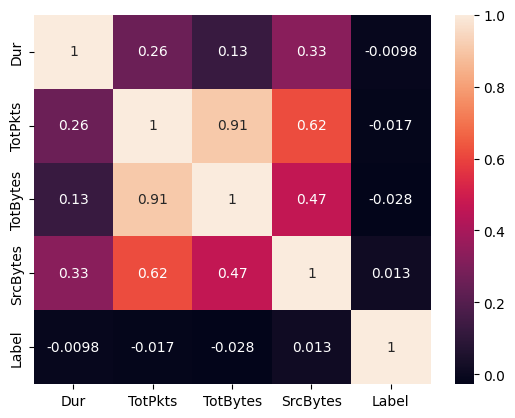

In [294]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='TotPkts', ylabel='TotBytes'>

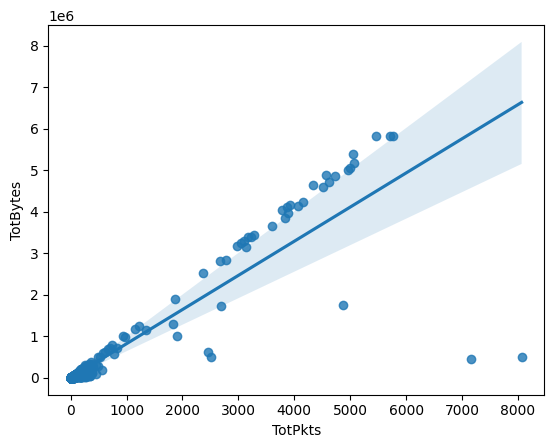

In [295]:
sns.regplot(x = data['TotPkts'], y = data['TotBytes'])

In [296]:
data.drop(columns=['TotPkts'], inplace=True)

In [297]:
table = pd.pivot_table(data.groupby(['Proto', 'Dir']).size().reset_index(), index=['Proto'], columns=['Dir'])
# Delete columns with Nan values and convert to integers
table.fillna(0, inplace=True)
table[0].astype(int)

Dir,->,?>,<->,<?>
Proto,,,,
icmp,15,0,0,0
tcp,5005,4,0,26
udp,4,0,6472,0


In [298]:
data.drop(columns=['Dir'], inplace=True)

In [299]:
data.groupby(['SrcAddr'])['Label'].value_counts()

SrcAddr        Label
147.32.80.9    0.0         4
147.32.84.134  0.0      1011
147.32.84.137  0.0         2
147.32.84.15   0.0         3
147.32.84.164  0.0      2680
147.32.84.165  1.0      2693
147.32.84.170  0.0      5058
147.32.84.25   0.0         3
147.32.84.5    0.0         3
147.32.84.59   0.0        14
147.32.84.8    0.0         3
147.32.86.111  0.0         1
147.32.86.140  0.0         1
147.32.86.187  0.0         4
147.32.86.96   0.0         3
147.32.87.212  0.0         2
147.32.87.214  0.0         2
147.32.87.252  0.0         3
147.32.87.36   0.0        36
Name: Label, dtype: int64

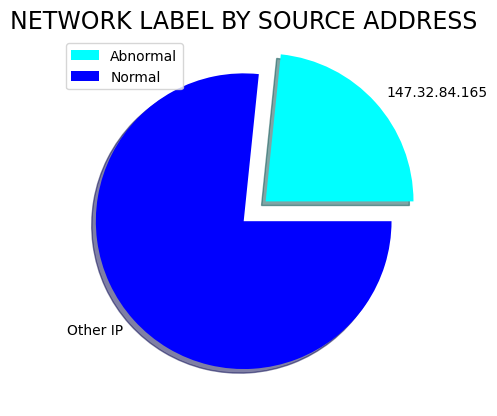

In [300]:
plt.pie([2693, 8833], labels = ['147.32.84.165', 'Other IP'], colors=['Cyan', 'Blue'], explode=[0.2 , 0], shadow=True)
plt.legend(labels = ['Abnormal', 'Normal'])
plt.title('NETWORK LABEL BY SOURCE ADDRESS', fontsize= 17)
plt.show()

In [301]:
data.drop(columns=['SrcAddr'], inplace=True)

In [302]:
data.describe(include='object')

,Proto,Sport,DstAddr,Dport,State
count,11526,11526,11526,11526,11526
unique,3,9978,891,41,42
top,udp,1291,147.32.80.9,53,CON
freq,6476,110,6378,6433,6472


In [350]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['Sport'] = le.fit_transform(data['Sport'])
data = pd.get_dummies(data)
data

,Dur,Sport,TotBytes,SrcBytes,Label,Proto_icmp,Proto_tcp,Proto_udp,DstAddr_1.22.16.143,DstAddr_101.0.32.121,...,State_SRA_SA,State_SRA_SRA,State_SRPA_FSPA,State_SRPA_SA,State_SRPA_SPA,State_SR_SA,State_S_,State_S_FRA,State_S_RA,State_URP
0,0.000000,7964,141.0,141.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,7964,247.0,247.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,7964,173.0,173.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000291,4360,207.0,72.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000321,6297,247.0,72.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11527,0.018193,8538,412.0,272.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11528,0.000251,8440,244.0,81.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11529,0.000472,4622,280.0,81.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11530,0.382413,8415,1218.0,549.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
data['Label'].value_counts()

0.0    8833
1.0    2693
Name: Label, dtype: int64

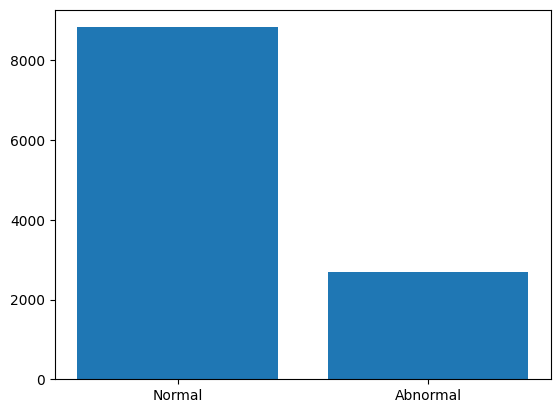

In [306]:
plt.bar(['Normal', 'Abnormal'], [8833, 2693])
plt.show()

In [307]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for i, (train_index, test_index) in enumerate(sss.split(data.drop(columns='Label'), data['Label'])):
    train = data.iloc[train_index].reset_index(drop=True)
    test_valid = data.iloc[test_index].reset_index(drop=True)

In [308]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

for i, (test_index, valid_index) in enumerate(sss.split(test_valid.drop(columns='Label'), test_valid['Label'])):
    test = test_valid.iloc[test_index].reset_index(drop=True)
    valid = test_valid.iloc[valid_index].reset_index(drop=True)

In [310]:
print('Train data: ' + str(round(len(train)/len(data)*100)) + '%')
print(train['Label'].value_counts() / len(train))
print()
print('Validation data: ' + str(round(len(valid)/len(data)*100)) + '%')
print(valid['Label'].value_counts() / len(valid))
print()
print('Test data: ' + str(round(len(test)/len(data)*100)) + '%')
print(test['Label'].value_counts() / len(test))


Train data: 80%
0.0    0.766377
1.0    0.233623
Name: Label, dtype: float64

Validation data: 10%
0.0    0.766696
1.0    0.233304
Name: Label, dtype: float64

Test data: 10%
0.0    0.765828
1.0    0.234172
Name: Label, dtype: float64


3. Model

In [311]:
X_train = train.drop(columns='Label').to_numpy()
y_train = train['Label']

X_valid = valid.drop(columns='Label').to_numpy()
y_valid = valid['Label']

X_test = test.drop(columns='Label').to_numpy()
y_test = test['Label']

In [321]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.metrics import accuracy_score

In [391]:
xgb_model = XGBClassifier(learning_rate = 0.3,
                        n_estimators = 100,
                        max_depth = 6,
                        random_state=97)
xgb_model.fit(X_train, y_train)
accuracy_score(xgb_model.predict(X_train), y_train), accuracy_score(xgb_model.predict(X_valid), y_valid)

(1.0, 1.0)

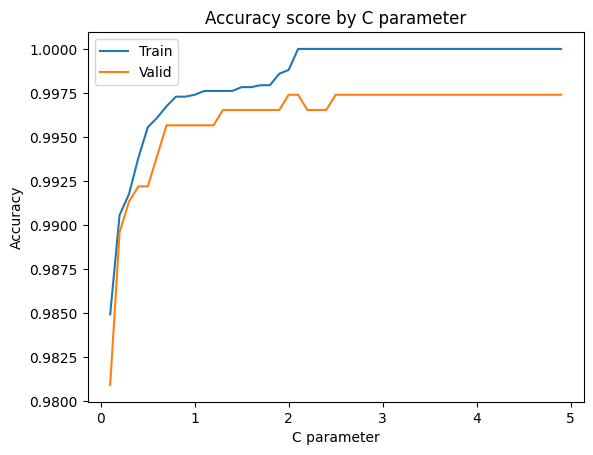

In [407]:
C = [i*0.1 for i in range(1, 50)]
lr_train_acu = []
lr_valid_acu = []
for c in C:
    lr_model = LogisticRegression(penalty='l1', solver='liblinear', C=c, random_state=97)
    lr_model.fit(X_train, y_train)
    lr_train_acu.append(accuracy_score(lr_model.predict(X_train), y_train))
    lr_valid_acu.append(accuracy_score(lr_model.predict(X_valid), y_valid))

plt.plot(C, lr_train_acu, label='Train')
plt.plot(C, lr_valid_acu, label='Valid')
plt.title('Accuracy score by C parameter')
plt.xlabel('C parameter')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [414]:
C[lr_valid_acu.index(max(lr_valid_acu))]
#C = 2

2.0

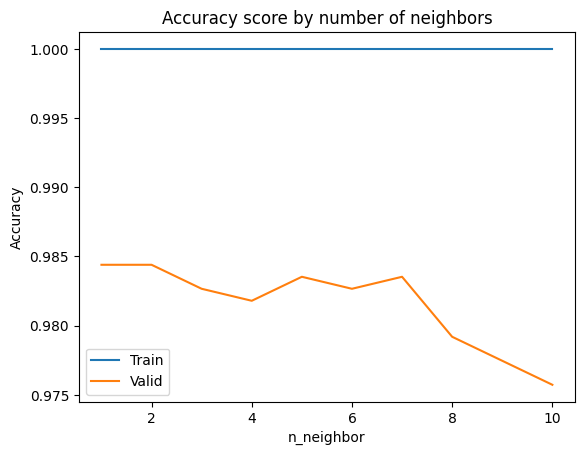

In [408]:
num_neighbors = [i for i in range(1, 11)]
KNN_train_acu = []
KNN_valid_acu = []
for n in num_neighbors:
    KNN_model = neighbors.KNeighborsClassifier(weights='distance', algorithm='brute', n_neighbors=n)
    KNN_model.fit(X_train, y_train)
    KNN_train_acu.append(accuracy_score(KNN_model.predict(X_train), y_train))
    KNN_valid_acu.append(accuracy_score(KNN_model.predict(X_valid), y_valid))

plt.plot(num_neighbors, KNN_train_acu, label='Train')
plt.plot(num_neighbors, KNN_valid_acu, label='Valid')
plt.title('Accuracy score by number of neighbors')
plt.xlabel('n_neighbor')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [416]:
num_neighbors[KNN_valid_acu.index(max(KNN_valid_acu))]
#n_neighbors = 1

1

4. Evaluation

In [417]:
xgb_model = XGBClassifier(learning_rate = 0.3,
                        n_estimators = 100,
                        max_depth = 6,
                        random_state=97)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=97,
              reg_alpha=0, reg_lambda=1, ...)

In [423]:
accuracy_score(xgb_model.predict(X_train), y_train)

1.0

In [424]:
accuracy_score(xgb_model.predict(X_test), y_test)

1.0

In [429]:
lr_model = LogisticRegression(penalty='l1',
                            solver='liblinear',
                            C=2, 
                            random_state=97)
lr_model.fit(X_train, y_train)

LogisticRegression(C=2, penalty='l1', random_state=97, solver='liblinear')

In [430]:
accuracy_score(lr_model.predict(X_train), y_train)

0.9988069414316703

In [431]:
accuracy_score(lr_model.predict(X_test), y_test)

0.9956634865568084

In [432]:
KNN_model = neighbors.KNeighborsClassifier(weights='distance',
                                        algorithm='brute',
                                        n_neighbors=1)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=1, weights='distance')

In [433]:
accuracy_score(KNN_model.predict(X_train), y_train)

1.0

In [434]:
accuracy_score(KNN_model.predict(X_test), y_test)

0.9878577623590633

In [435]:
dict = {'Model':['XGboost', 'Logistic Regression', 'KNN'],
        'Train accuracy':[1.0, 0.9988, 1.0],
        'Test accuracy':[1.0, 0.9957, 0.9879],
        'Train time':['8.7s', '0.2s', 'trivial'],
        'Predict time':['trivial', 'trivial', '0.4s']
       }
result = pd.DataFrame(dict)
result

,Model,Train accuracy,Test accuracy,Train time,Predict time
0,XGboost,1.0000,1.0000,8.7s,trivial
1,Logistic Regression,0.9988,0.9957,0.2s,trivial
2,KNN,1.0000,0.9879,trivial,0.4s
